# Example of random sequence generation
This notebook is to experiment with random sequence generation

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)



#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '8b1969b503c94272f7eccbd537d469922725b10e'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import Protocol, BCPNNFast, NetworkManager
from connectivity_functions import  calculate_random_sequence, calculate_overlap_matrix
from connectivity_functions import calculate_overlap_one_to_all, calculate_overlap_one_to_one
from connectivity_functions import  artificial_connectivity_matrix
from plotting_functions import plot_artificial_sequences, plot_winning_pattern
from analysis_functions import calculate_timings, calculate_recall_success

## The example

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

sequence_length = 5
overload = 200
overlap = 4
one_to_one = True


# Desired patterns
total_sequences = 252

# Running parameters
max_iter = 1e4

# Random seed
prng = np.random.RandomState(seed=2)

In [5]:
aux = calculate_random_sequence(minicolumns, sequence_length, overlap,  overload,  one_to_one=one_to_one,
                                prng=prng, total_sequences=total_sequences, max_iter=max_iter)
sequences, overlap_dictionary, overload_matrix = aux

# Calculate characteirstics
if one_to_one:
    total_overlap = calculate_overlap_one_to_one(sequences)
else:
    total_overlap = calculate_overlap_one_to_all(overlap_dictionary)

overlap_matrix = calculate_overlap_matrix(sequences)

number of sequences
252
overload matrix
[ 126.  126.  126.  126.  126.  126.  126.  126.  126.  126.]
overlap matrix
[[ 0.  2.  3. ...,  2.  2.  2.]
 [ 2.  0.  1. ...,  2.  4.  2.]
 [ 3.  1.  0. ...,  2.  2.  2.]
 ..., 
 [ 2.  2.  2. ...,  0.  3.  3.]
 [ 2.  4.  2. ...,  3.  0.  2.]
 [ 2.  2.  2. ...,  3.  2.  0.]]
total overlap
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.

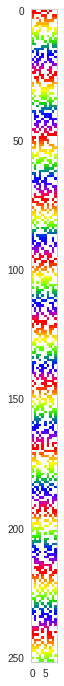

In [6]:
print('number of sequences')
print(len(sequences))
print('overload matrix')
print(overload_matrix)
print('overlap matrix')
print(overlap_matrix)
print('total overlap')
print(total_overlap)
plot_artificial_sequences(sequences, minicolumns)

## Example with recall

In [7]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

dt = 0.001

value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 1.0
extension = 2

sequence_length = 5
overload = 2
overlap = 4
one_to_one = True

# Desired patterns
total_sequences = 10

# Running parameters
max_iter = 1e4

# Random seed
prng = np.random.RandomState(seed=2)

In [8]:
aux = calculate_random_sequence(minicolumns, sequence_length, overlap,  overload,  one_to_one=one_to_one,
                                prng=prng, total_sequences=total_sequences, max_iter=max_iter)
sequences, overlap_dictionary, overload_matrix = aux
n_sequences = len(sequences)

w_nmda = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        diagonal_zero=True, self_influence=True, ampa=False)

w_ampa = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        diagonal_zero=True, self_influence=True, ampa=True)

nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
nn.w = w_nmda
nn.w_ampa = w_ampa
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
for pattern_indexes in sequences:
    manager.stored_patterns_indexes += pattern_indexes


sequence_to_Recall
[36, 47, 28, 9, 13]
sequence recalled
(36, 0.30099999999999999)
(47, 0.53900000000000003)
(28, 0.74399999999999999)
(9, 0.95300000000000007)
(13, 1.196)
(4, 1.3960000000000001)
(42, 1.6020000000000001)
(17, 1.8129999999999999)
(43, 2.0979999999999999)


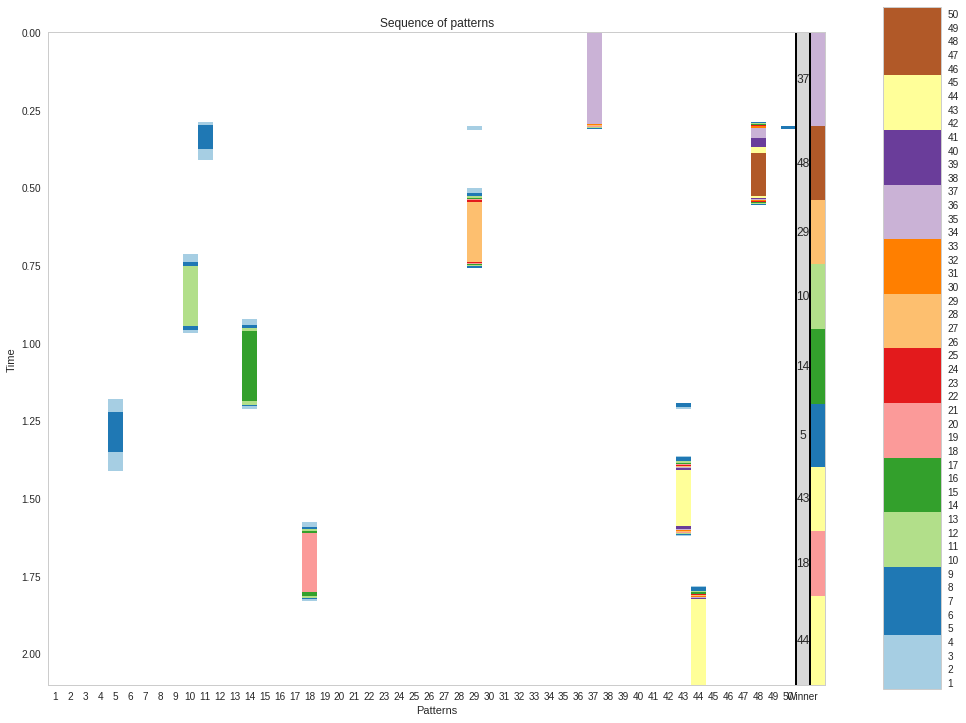

In [9]:
# Recall
T_cue = 0.100
n_recall = 0
sequence_to_recall = sequences[n_recall]
print('sequence_to_Recall')
print(sequence_to_recall)
I_cue = sequence_to_recall[0]
T_recall = 2.0
manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)
plot_winning_pattern(manager)
timings = calculate_timings(manager, remove=0.010)
pair = [(x[0], x[3]) for x in timings]

print('sequence recalled')
for x in pair:
    print(x)

## More examples

In [10]:
# Patterns parameters
hypercolumns = 4
minicolumns = 15
n_patterns = 10

dt = 0.001

value = 1.0
inhibition = -1
decay_factor = 0.5
sequence_decay = 0.9
extension = 2

sequence_length = 4
overload = 3
overlap = 3
one_to_one = True

# Desired patterns
total_sequences = 5

# Running parameters
max_iter = 1e4

# Random seed
prng = np.random.RandomState(seed=2)

In [11]:
aux = calculate_random_sequence(minicolumns, sequence_length, overlap,  overload,  one_to_one=one_to_one,
                                prng=prng, total_sequences=total_sequences, max_iter=max_iter)
sequences, overlap_dictionary, overload_matrix = aux
n_sequences = len(sequences)

w_nmda = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        diagonal_zero=True, self_influence=True, ampa=False)

w_ampa = artificial_connectivity_matrix(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        diagonal_zero=True, self_influence=True, ampa=True)

nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
nn.w = w_nmda
nn.w_ampa = w_ampa
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
for pattern_indexes in sequences:
    manager.stored_patterns_indexes += pattern_indexes

In [12]:
# Recall
n = 10
T_cue = 0.100
successes = []
T_recall = 2.0
for n_recall in range(total_sequences):
    sequence_to_recall = sequences[n_recall]
    print('sequence to recall')
    print(sequence_to_recall)
    I_cue = sequence_to_recall[0]

    success = calculate_recall_success(manager, T_recall, I_cue, T_cue, n, patterns_indexes=sequence_to_recall)
    successes.append(success)

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)
    timings = calculate_timings(manager, remove=0.010)
    pair = [(x[0], x[3]) for x in timings]

    for x in pair:
        print(x)

    print('success')
    print(success)
    print('----------------')

plt.show()

sequence to recall
[11, 4, 5, 0]
(11, 0.30099999999999999)
(4, 0.52700000000000002)
(5, 0.74099999999999999)
(0, 1.121)
(14, 1.232)
(14, 1.266)
(7, 1.6839999999999999)
(10, 1.7030000000000001)
(6, 1.7710000000000001)
(9, 1.8049999999999999)
(6, 1.8400000000000001)
(9, 1.8500000000000001)
(6, 1.8740000000000001)
(13, 2.0979999999999999)
success
80.0
----------------
sequence to recall
[10, 9, 14, 0]
(10, 0.30099999999999999)
(9, 0.51400000000000001)
(14, 0.73399999999999999)
(0, 1.107)
(5, 1.4670000000000001)
(4, 1.6679999999999999)
(3, 1.867)
(11, 2.0979999999999999)
success
100.0
----------------
sequence to recall
[11, 12, 1, 5]
(11, 0.30099999999999999)
(4, 0.52700000000000002)
(5, 0.74099999999999999)
(0, 1.121)
(3, 1.1380000000000001)
(7, 1.1520000000000001)
(13, 1.161)
(13, 1.1830000000000001)
(7, 1.6580000000000001)
(1, 1.752)
(14, 1.9510000000000001)
(13, 2.0979999999999999)
success
0.0
----------------
sequence to recall
[5, 4, 3, 11]
(5, 0.30299999999999999)
(4, 0.52200000000

#### Git machinery

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])